In [1]:
#타랑께 평일
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
a = pd.read_csv('평일_최종.csv',index_col = 0,encoding = 'utf-8') #데이터 불러오기
df = pd.DataFrame(a)
df

,출발시각,사용시간
1,2020-07-01 8:25,0 days 00:06:24
2,2020-07-01 11:21,0 days 01:02:50
3,2020-07-01 11:34,0 days 00:09:59
4,2020-07-01 11:40,0 days 00:18:59
5,2020-07-01 12:45,0 days 00:08:58
...,...,...
7485,2021-02-05 13:59,0 days 00:07:28
7486,2021-02-05 14:11,0 days 00:18:05
7487,2021-02-05 14:16,0 days 01:14:11
7488,2021-02-05 14:50,0 days 03:49:59


--------

# 탑승지속시간

In [2]:
usage=[]
for x in range(1, len(df)):
    usage.append(df['사용시간'][x]) #'사용시간' 칼럼 리스트로 추출 

## hour

In [3]:
hour = []
minute = []
for i in range(0, len(usage)):
    if usage[i][8] == '0':
        minute.append(usage[i][10:12]) #1시간 미만이면 분 추출
    elif usage[i][8] != '0' :
        hour.append(usage[i][8]) #1시간 이상이면 시 추출

In [4]:
hour_int = list(map(int, hour))
remove_set = {4, 5, 6, 7, 8, 9}
hour_new = [i for i in hour_int if i not in remove_set]

In [5]:
dict = {}
for v in hour_new:
    if dict.get(v): dict[v]+=1
    else : dict[v]=1
        
print(dict)

{1: 1506, 2: 140, 3: 47}


In [17]:
hour = [60, 120, 180]
hour_count = (list(dict.values()))

In [18]:
hour_count

[1506, 140, 47]

## minute

In [8]:
minute.sort()

In [9]:
dict1 = {}
for v in minute:
    if dict1.get(v): dict1[v]+=1 #분 추출
    else : dict1[v]=1

In [10]:
x = (list(dict1.keys()))
y = (list(dict1.values()))
x = list(map(int, x))

In [11]:
minute_by_10 = []
division = [10, 20, 30, 40, 50, 60] 
for i in division: #10분 단위 분류
    q = sum(y[i-10:i])
    minute_by_10.append(q)

## hour + minute

In [12]:
a = division + hour
b = minute_by_10 + hour_count

In [13]:
a = ['~10분', '~20분', '~30분', '~40분', '~50분', '~60분', '~120분', '~180분', '그외']

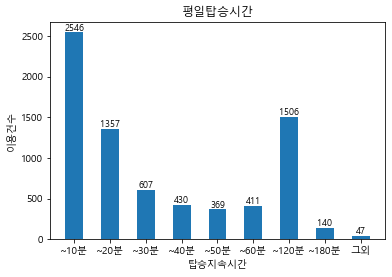

In [16]:
#시각화
plt.rcParams['font.family'] = 'Malgun Gothic' #폰트 설정
plt.xlabel('탑승지속시간')
plt.ylabel('이용건수')
plt.title('평일탑승시간')
plt.bar(a, b, width=0.5)

for i,v in enumerate(a) :
    plt.text(v, b[i], b[i],
            fontsize =9,
             color = 'black',
             horizontalalignment='center',
              verticalalignment='bottom'
            )

plt.show()

# 시간대별 현황

In [30]:
start=[]
for x in range(1, len(df)):
    start.append(df['출발시각'][x]) 

In [31]:
time1 = []
for i in range(0, len(start)):
    if start[i][12] == ':': #시간대별 집계 분류
        time1.append(start[i][11]) 
    else:
        time1.append(start[i][11:13])

In [32]:
time1_list = [int (i) for i in time1]

In [33]:
time1_list.sort()

In [34]:
dict2 = {}
for v in time1_list: #시간대별 집계 
    if dict2.get(v): dict2[v]+=1 
    else : dict2[v]=1
        
print(dict2)

{7: 114, 8: 482, 9: 380, 10: 262, 11: 376, 12: 394, 13: 423, 14: 544, 15: 572, 16: 636, 17: 762, 18: 977, 19: 786, 20: 773, 21: 7}


In [35]:
a = (list(dict2.keys()))
b = (list(dict2.values())) #키 값, 밸류 값 각각 리스트 화

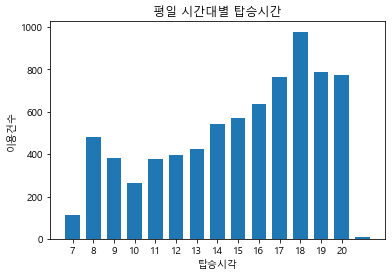

In [36]:
#평일 시간대별 이용 시간대
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.xlabel('탑승시각')
plt.ylabel('이용건수')
plt.bar(a, b, width=0.7)
plt.title('평일 시간대별 탑승시간')
plt.xticks(range(min(a),max(a),1))
plt.show()

---------